# PCA Principal Component Analysis

In [1]:
#Importing libraroies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc

In [2]:
# Load data set
data= pd.read_csv('./wine.data')

In [3]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
with open('./wine.names') as f:
    print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [5]:

# Importing the data

data= pd.read_csv('./wine.data',header=None, names=['Label','Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','phenols'
                                                    ,'Flavanoids','Nonflavanoid','Proanthocyanins','Color_intensity','Hue'
                                                    ,'diluted_wines','Proline'])


In [6]:
data.head()

,Label,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Separate Class var
x= data.iloc[:,1:]

In [8]:
# normailizing the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [9]:
x_Scaled = scale.fit_transform(x)

# Impelementation PCA from sklearn.decomp... by Das, Pranab


In [10]:

# Impelementation PCA
from sklearn.decomposition import PCA
pca=PCA()

pca.fit(x_Scaled) 

PCA()

In [11]:

# extract the eigenValues
eigValues=pca.explained_variance_

In [12]:
# the percentage of information
ratio = pca.explained_variance_ratio_

In [13]:
# cumalitive ratio
ratio_cum = np.cumsum(ratio)

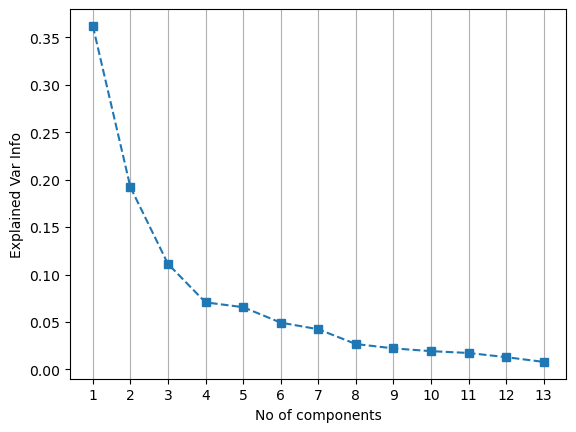

In [14]:
# No of components vs Explained Varience
plt.plot(ratio,'s--')
plt.xlabel("No of components"), plt.ylabel("Explained Var Info")
plt.grid(axis='x')
plt.xticks(list(range(0,len(ratio))),list(range(1,len(ratio)+1)))
plt.show()

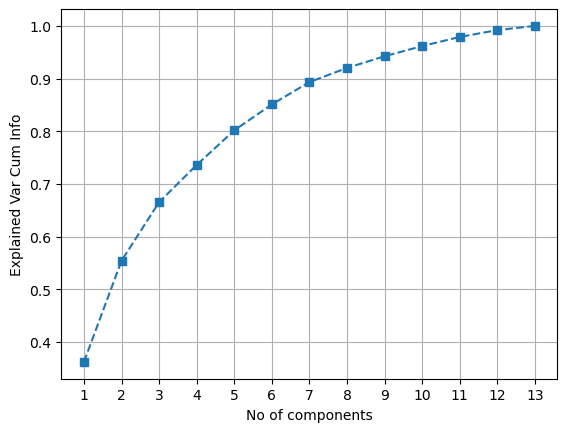

In [15]:
# No of components vs Cum Info
plt.plot(ratio_cum,'s--')
plt.xlabel("No of components"), plt.ylabel("Explained Var Cum Info")
plt.grid()
plt.xticks(list(range(0,len(ratio))),list(range(1,len(ratio)+1)))
plt.show()

### From this two graphs no of components we got = 5

In [16]:
# retrain PCA with 5 components
pca=PCA(n_components=5)

In [17]:
xpca=pca.fit_transform(x_Scaled)

In [18]:
xpca.shape

(178, 5)

In [19]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ]])

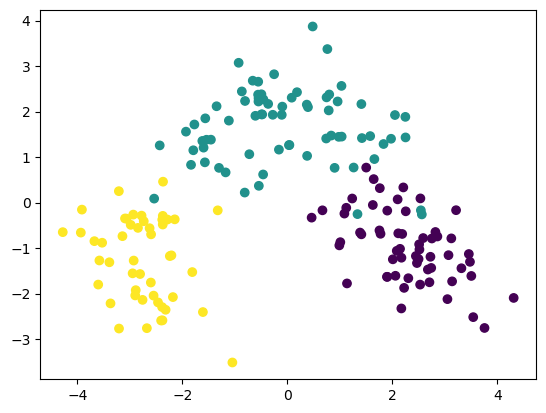

In [20]:
plt.scatter(xpca[:,0],xpca[:,1], c= data.Label)